In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Collecting the results of the experiments

## Functions

In [41]:
def recursive_results(path,dirlist,str_, res_):
    """ 
    A recursive search for the results - it's like a sniffing dog really.
    """
    if "res_summary.csv" in dirlist:
        res = pd.read_csv(os.path.join(path,"res_summary.csv"))
        return [res], str_
    else:
        r_tmp = res_.copy()
        s_tmp = []
        for d in dirlist:
            path_ = os.path.join(path,d)
            r_, s_ = recursive_results(path_, os.listdir(path_), [str_[0] + "-*-" + d],res_)
            r_tmp = r_tmp + r_
            s_tmp = s_tmp + s_
        return r_tmp, s_tmp
    
def get_time_series(df,signal):
    ts = []
    for stage in ['Low','Mid-low','Mid-high','High']:
        df_ = df[stage].copy()
        ts.append(df_.loc[df_.Signal==signal]["p-value"].item())
    return ts

## Tables

making automatic latex tables. Not pretty but efficient. American style.

In [31]:
dir_path = os.path.join("results", "ihdp")
setups = ["samePOihdp_GC","samePOihdp-highhc_GC","samePOihdp-lowhc_GC","diffPOihdp-highdiff_GC","diffPOihdp-lowdiff_GC"]

setups_names_dict = {"samePOihdp_GC": "Same PO, GC",
                     "samePOihdp-highhc_GC": "Same PO, GC, high HC",
                     "samePOihdp-lowhc_GC": "Same PO, GC, low HC",
                     "diffPOihdp-highdiff_GC": "Diff PO, GC, high diff",
                     "diffPOihdp-lowdiff_GC": "Diff PO, GC, low diff"}

### Collecting results and aggregating in a big fat ass DF

In [33]:
M = "3"

In [34]:
df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])

/tmp/ipykernel_3502225/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3502225/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3502225/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3502225/126393597.py:11: FutureWarning: Series.__getite

In [35]:
print(df.to_latex(escape = False,index = False))

\begin{tabular}{llllrllllrllllrllllrllllr}
\toprule
\multicolumn{5}{r}{Same PO, GC} & \multicolumn{5}{r}{Same PO, GC, high HC} & \multicolumn{5}{r}{Same PO, GC, low HC} & \multicolumn{5}{r}{Diff PO, GC, high diff} & \multicolumn{5}{r}{Diff PO, GC, low diff} \\
Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value \\
\midrule
CDR & 3 & CD-10 & UC-0 & 0.725000 & CDR & 3 & CD-10 & UC-1 & 0.825000 & CDR & 3 & CD-10 & UC-1 & 0.700000 & CDR & 3 & CD-10 & UC-0 & 1.000000 & CDR & 3 & CD-10 & UC-0 & 0.300000 \\
DR-Drop & 3 & CD-10 & UC-0 & 0.075000 & DR-Drop & 3 & CD-10 & UC-1 & 1.000000 & DR-Drop & 3 & CD-10 & UC-1 & 0.650000 & DR-Drop & 3 & CD-10 & UC-0 & 1.000000 & DR-Drop & 3 & CD-10 & UC-0 & 0.425000 \\
DR-Impute & 3 & CD-10 & UC-0 & 0.050000 & DR-Impute & 3 & CD-10 & UC-1 & 1.000000 & DR-Impute & 3 & CD-10 & UC-1 & 0.550000 & DR-Impute & 3 & CD-10 & UC-0 & 1.000000 & DR-Impute & 3 

## Figures

### Diff

In [71]:
M = "3"

In [72]:
dir_path = os.path.join("results", "ihdp")
setups = ["diffPOihdp-lowdiff","diffPOihdp-midlowdiff","diffPOihdp-midhighdiff","diffPOihdp-highdiff"]
#setups = ["diffPOihdp-midlowdiff","diffPOihdp-midhighdiff"]

setups_names_dict = {"diffPOihdp-lowdiff": "Low",
                        "diffPOihdp-midlowdiff": "Mid-low",
                        "diffPOihdp-midhighdiff": "Mid-high",
                        "diffPOihdp-highdiff": "High"}

In [73]:
df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])

/tmp/ipykernel_3753071/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3753071/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3753071/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3753071/126393597.py:11: FutureWarning: Series.__getite

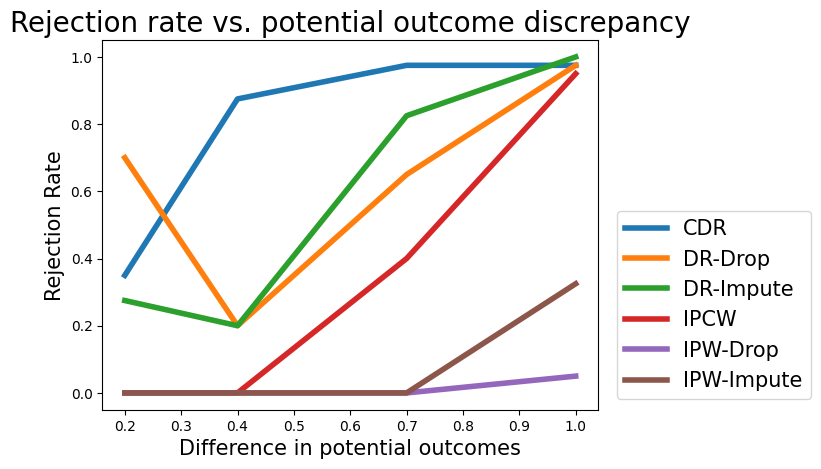

In [79]:
xs = [0.2,0.4,0.7,1.0]

plt.figure()
for signal in ["CDR","DR-Drop","DR-Impute","IPCW","IPW-Drop","IPW-Impute"]:
    ts = get_time_series(df,signal)
    plt.plot(xs, ts,label = signal, linewidth = 4)
plt.legend(fontsize = 15,loc = "lower right",bbox_to_anchor=(1.45, 0.0))
plt.ylabel("Rejection Rate", fontsize = 15)
plt.xlabel("Difference in potential outcomes", fontsize = 15)
plt.title("Rejection rate vs. potential outcome discrepancy", fontsize = 20)
plt.show()

### Hidden confounders

In [45]:
dir_path = os.path.join("results", "ihdp")
setups = ["samePOihdp-lowhc","samePOihdp-midlowhc", "samePOihdp-midhighhc", "samePOihdp-highhc"]

setups_names_dict = {"samePOihdp-lowhc": "Low",
                        "samePOihdp-midlowhc": "Mid-low",
                        "samePOihdp-midhighhc": "Mid-high",
                        "samePOihdp-highhc": "High"}

In [49]:
df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])

/tmp/ipykernel_3753071/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3753071/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3753071/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3753071/126393597.py:11: FutureWarning: Series.__getite

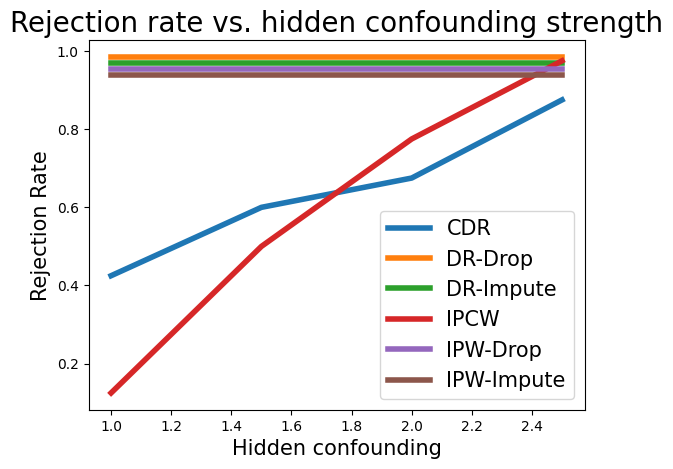

In [70]:
xs = [1,1.5,2,2.5]

plt.figure()
cnt = 1
for signal in ["CDR","DR-Drop","DR-Impute","IPCW","IPW-Drop","IPW-Impute"]:
    ts = get_time_series(df,signal)
    if (ts[0]==1):
        ts = [t - cnt * 0.015 for t in ts]
        cnt += 1
    plt.plot(xs, ts,label = signal, linewidth = 4)

plt.legend(fontsize = 15)
plt.ylabel("Rejection Rate", fontsize = 15)
plt.xlabel("Hidden confounding", fontsize = 15)
plt.title("Rejection rate vs. hidden confounding strength", fontsize = 20)
plt.show()